<a href="https://colab.research.google.com/github/Priya-Samanta/Machine-Learning/blob/main/Assignment1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name - Priya Samanta
# Enrollment ID - 2021CSB035

# Assignment - 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

(ii) Read the dataset in the Pandas data frame. Estimate the missing values with any technique of your choice. Divide the dataset into two sets using stratified k-fold cross validation technique entitled to train and test set respectively.

### Reading Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Handling missing values

Handle missing values

In [54]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Impute missing values for numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[np.number]).columns] = numeric_imputer.fit_transform(df.select_dtypes(include=[np.number]))

# Impute missing values for non-numeric columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = categorical_imputer.fit_transform(df[non_numeric_cols])


### K-Fold Cross Validation

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
folds = StratifiedKFold(n_splits=5)

In [64]:
def Kfold_util(model,X_data,y_data):
    s_kfold = KFold(n_splits=5)
    model_r2_score = 0
    model_MSE_score = 0
    for i,(train_index,test_index) in enumerate(s_kfold.split(X_data,y_data)):
        print(f"fold: {i+1}")
        model.fit(X_data[train_index],y_data[train_index])
        r2_score = model.score(X_data[test_index],y_data[test_index])
        y_pred = model.predict(X_data[test_index])
        MSE_score = mean_squared_error(y_data[test_index],y_pred)
        print(f"R2 score is: {r2_score} and Mean Square error is: {MSE_score}")
        model_r2_score += r2_score
        model_MSE_score += MSE_score
    return (model_r2_score/5,model_MSE_score/5)

(iii) Use the linear regression method to estimate the slope and intercept for predicting“SalePrice” based on “LotArea”.

Slope: 2.0999719517076745
Intercept: 158836.1518968766


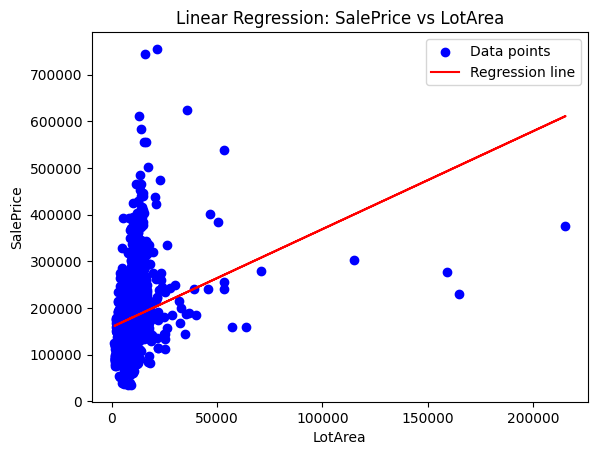

In [4]:
X = df[['LotArea']]  # Predictor
y = df['SalePrice']  # Response

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plotting the regression line with the data points
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression: SalePrice vs LotArea')
plt.legend()
plt.show()

### Models 1 to 3

(iv) Use the multiple regression method to estimate the value of the weights/coefficients for predicting “SalePrice” based on the following features:
a. Model 1: LotFrontage, LotArea
b. Model 2: LotFrontage, LotArea, OverallQual, OverallCond
c. Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF,GrLivArea


(v)Calculate and compare the Mean Squared Error, R2 score for each of the model






using the training set and test set.

In [65]:
from sklearn.linear_model import LinearRegression

# Extract the features and target variable
X = df['LotArea'].values.reshape(-1, 1)  # Reshape to a 2D array for sklearn
y = df['SalePrice'].values

# Initialize the Linear Regression model
model = LinearRegression()

avg_r2_score,avg_MSE = Kfold_util(model,X_data=X,y_data=y)
print(f"Average R2 score is :- {avg_r2_score}")
print(f"Average mean square error is :- {avg_MSE}")

fold: 1
R2 score is: 0.0811255840664582 and Mean Square error is: 5083791990.222536
fold: 2
R2 score is: -0.09677051342182441 and Mean Square error is: 7206516872.48441
fold: 3
R2 score is: 0.09034415298115273 and Mean Square error is: 6893188266.548201
fold: 4
R2 score is: 0.04542629407540688 and Mean Square error is: 4835731884.893979
fold: 5
R2 score is: 0.06551930527251171 and Mean Square error is: 6266038369.012835
Average R2 score is :- 0.03712896459474102
Average mean square error is :- 6057053476.632393


In [68]:
# Model 1: LotFrontage, LotArea
X1 = df[['LotFrontage', 'LotArea']]
y1 = df[['SalePrice']]

model1 = LinearRegression()
model1.fit(X1, y1)

model1_r2_score,model1_MSE = Kfold_util(model1,X_data=X1.to_numpy(),y_data=y1.to_numpy())
print(f"Average R2 score is :- {model1_r2_score}")
print(f"Average mean square error is :- {model1_MSE}")

fold: 1
R2 score is: 0.18158942070731465 and Mean Square error is: 4527962772.251632
fold: 2
R2 score is: 0.08612808848449904 and Mean Square error is: 6004750555.409112
fold: 3
R2 score is: 0.13887798066492563 and Mean Square error is: 6525408723.749831
fold: 4
R2 score is: 0.05751921400603843 and Mean Square error is: 4774470907.216637
fold: 5
R2 score is: 0.09649449400924093 and Mean Square error is: 6058338282.529656
Average R2 score is :- 0.11212183957440373
Average mean square error is :- 5578186248.231374


In [70]:
# Model 2: LotFrontage, LotArea, OverallQual, OverallCond
X2 = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']]
y2 = df['SalePrice']

model2 = LinearRegression()
model2.fit(X2, y2)

model2_r2_score,model2_MSE = Kfold_util(model2,X_data=X2.to_numpy(),y_data=y2.to_numpy())
print(f"Average R2 score is :- {model2_r2_score}")
print(f"Average mean square error is :- {model2_MSE}")

fold: 1
R2 score is: 0.716467041536693 and Mean Square error is: 1568682899.6489449
fold: 2
R2 score is: 0.6652423120902687 and Mean Square error is: 2199582224.898411
fold: 3
R2 score is: 0.6515343206053472 and Mean Square error is: 2640602531.5727997
fold: 4
R2 score is: 0.6422526397267325 and Mean Square error is: 1812296217.749322
fold: 5
R2 score is: 0.6195504501967772 and Mean Square error is: 2551054815.7828403
Average R2 score is :- 0.6590093528311638
Average mean square error is :- 2154443737.9304633


In [71]:
# Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea
X3 = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']]
y3 = df['SalePrice']

model3 = LinearRegression()
model3.fit(X3, y3)

model3_r2_score,model3_MSE = Kfold_util(model3,X_data=X3.to_numpy(),y_data=y3.to_numpy())
print(f"Average R2 score is :- {model3_r2_score}")
print(f"Average mean square error is :- {model3_MSE}")

fold: 1
R2 score is: 0.7882854582090815 and Mean Square error is: 1171338186.270877
fold: 2
R2 score is: 0.7572940313391908 and Mean Square error is: 1594740774.6675017
fold: 3
R2 score is: 0.7610953326362598 and Mean Square error is: 1810371312.7248375
fold: 4
R2 score is: 0.7329469976794663 and Mean Square error is: 1352851760.17627
fold: 5
R2 score is: 0.639299163896154 and Mean Square error is: 2418632392.850892
Average R2 score is :- 0.7357841967520304
Average mean square error is :- 1669586885.3380754


### Models 4 to 6

(vi) Use the multiple regression method to estimate the value of the
weights/coefficients for predicting “SalePrice” based on the following set of
mixed (numerical and categorical) features:
a. Model 4: LotArea, Street
b. Model 5: LotArea, OverallCond, Street, Neighborhood
c. Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year

In [78]:
street_set = set(df['Street'])
street_set

{'Grvl', 'Pave'}

In [79]:
# Model 4: LotArea, Street
X4 = df[['LotArea', 'Street']]
y4 = df['SalePrice']

# One-hot encode the categorical feature 'Street'
encoder = OneHotEncoder()
new_df = pd.DataFrame(
    encoder.fit_transform(df[['Street']]).toarray(),
    columns = encoder.get_feature_names_out()
)

X4 = X4.join(new_df)
X4 = X4.drop('Street',axis=1)

model4 = LinearRegression()
model4.fit(X4, y4)

model4_avg_r2f,model4_avg_MSE = Kfold_util(model4,X_data=X4.to_numpy(),y_data=y4.to_numpy())
print(f"Average R2 score is :- {model4_avg_r2f}")
print(f"Average mean square error is :- {model4_avg_MSE}")

fold: 1
R2 score is: 0.08083987276169624 and Mean Square error is: 5085372725.1058655
fold: 2
R2 score is: -0.06216483704535136 and Mean Square error is: 6979134400.3638525
fold: 3
R2 score is: 0.102774623160658 and Mean Square error is: 6798992674.369186
fold: 4
R2 score is: 0.056929075521841566 and Mean Square error is: 4777460463.1480665
fold: 5
R2 score is: 0.06650223035586045 and Mean Square error is: 6259447493.116865
Average R2 score is :- 0.04897619295094098
Average mean square error is :- 5980081551.220767


In [80]:
street_set1 = set(df['Neighborhood'])
street_set1

{'Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker'}

In [86]:
# Model 5: LotArea, OverallCond, Street, Neighborhood
X5 = df[['LotArea', 'OverallCond', 'Street', 'Neighborhood']]
y5 = df['SalePrice']

# One-hot encode categorical features
encoder = OneHotEncoder()
new_df = pd.DataFrame(
    encoder.fit_transform(df[['Street']]).toarray(),
    columns = encoder.get_feature_names_out()
)

X5 = X5.join(new_df)
X5 = X5.drop('Street',axis=1)

encoder = OneHotEncoder()
new_df = pd.DataFrame(
    encoder.fit_transform(df[['Neighborhood']]).toarray(),
    columns = encoder.get_feature_names_out()
)

X5 = X5.join(new_df)
X5 = X5.drop('Neighborhood',axis=1)

neighborhood_cols = X5.filter(regex='^Neighborhood_')
neighborhood_cols.head()

# Combine numerical and encoded categorical features
X5 = pd.concat([X5[['LotArea', 'OverallCond', 'Street_Grvl','Street_Pave']], neighborhood_cols], axis=1)

model5 = LinearRegression()
model5.fit(X5, y5)

model5_avg_r2f,model5_avg_MSE = Kfold_util(model5,X_data=X5.to_numpy(),y_data=y5.to_numpy())
print(f"Average R2 score is :- {model5_avg_r2f}")
print(f"Average mean square error is :- {model5_avg_MSE}")

fold: 1
R2 score is: 0.5841021043157792 and Mean Square error is: 2301009097.833854
fold: 2
R2 score is: 0.5261617473778633 and Mean Square error is: 3113434688.9909825
fold: 3
R2 score is: 0.5665378038610315 and Mean Square error is: 3284688966.9422917
fold: 4
R2 score is: 0.5250330812935398 and Mean Square error is: 2406113492.1310244
fold: 5
R2 score is: 0.545123175604145 and Mean Square error is: 3050117194.4170914
Average R2 score is :- 0.5493915824904716
Average mean square error is :- 2831072688.0630484


In [87]:
# Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year
X6 = df[['LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt']]  # Assuming 'Year' refers to 'YearBuilt'
y6 = df['SalePrice']

# One-hot encode categorical features
X6 = X5
X6 = pd.concat([X6,df[['1stFlrSF','YearBuilt','YearRemodAdd','YrSold']]],axis=1)

model6 = LinearRegression()
model6.fit(X6, y6)

model6_avg_r2f,model6_avg_MSE = Kfold_util(model6,X_data=X6.to_numpy(),y_data=y6.to_numpy())
print(f"Average R2 score is :- {model6_avg_r2f}")
print(f"Average mean square error is :- {model6_avg_MSE}")

fold: 1
R2 score is: 0.7095584627129405 and Mean Square error is: 1606905508.8314323
fold: 2
R2 score is: 0.7138242036094097 and Mean Square error is: 1880366658.2457325
fold: 3
R2 score is: 0.698559378913849 and Mean Square error is: 2284256138.3426213
fold: 4
R2 score is: 0.6829225245459274 and Mean Square error is: 1606268482.484338
fold: 5
R2 score is: 0.6451907294515968 and Mean Square error is: 2379127268.740516
Average R2 score is :- 0.6900110598467447
Average mean square error is :- 1951384811.328928


### compare

(vii) Compare the feature “LotArea” weights/coefficients for all the six trained models
and plot a graph using the Matplotlib library.

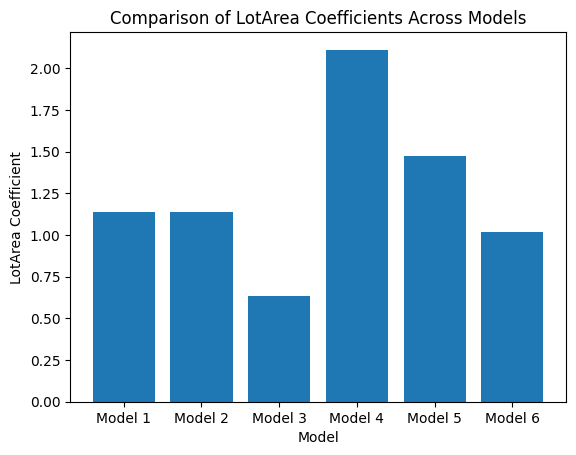

In [97]:
import matplotlib.pyplot as plt

# Extract LotArea coefficients
lot_area_coeffs = [
    model1.coef_[X1.columns.get_loc('LotArea')],
    model2.coef_[X2.columns.get_loc('LotArea')],
    model3.coef_[X3.columns.get_loc('LotArea')],
    model4.coef_[X4.columns.get_loc('LotArea')],
    model5.coef_[X5.columns.get_loc('LotArea')],
    model6.coef_[X6.columns.get_loc('LotArea')]
]

# Model names
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

# Create bar plot
plt.bar(model_names, lot_area_coeffs)
plt.xlabel('Model')
plt.ylabel('LotArea Coefficient')
plt.title('Comparison of LotArea Coefficients Across Models')
plt.show()


(viii) Use the polynomial regression of degree 2 and 3, to estimate the value of the
weights/coefficients for predicting “SalePrice” based on “LotArea”. Print the
graph on the training and test set (Bonus).


Polynomial Regression Degree 2 Coefficients:
Coefficient for x^0: 0.0
Coefficient for x^1: 6.04694474842409
Coefficient for x^2: -2.6928152799143845e-05

Polynomial Regression Degree 3 Coefficients:
Coefficient for x^0: 0.0
Coefficient for x^1: 9.225924726551256
Coefficient for x^2: -0.00010769327779915464
Coefficient for x^3: 3.333706644070844e-10


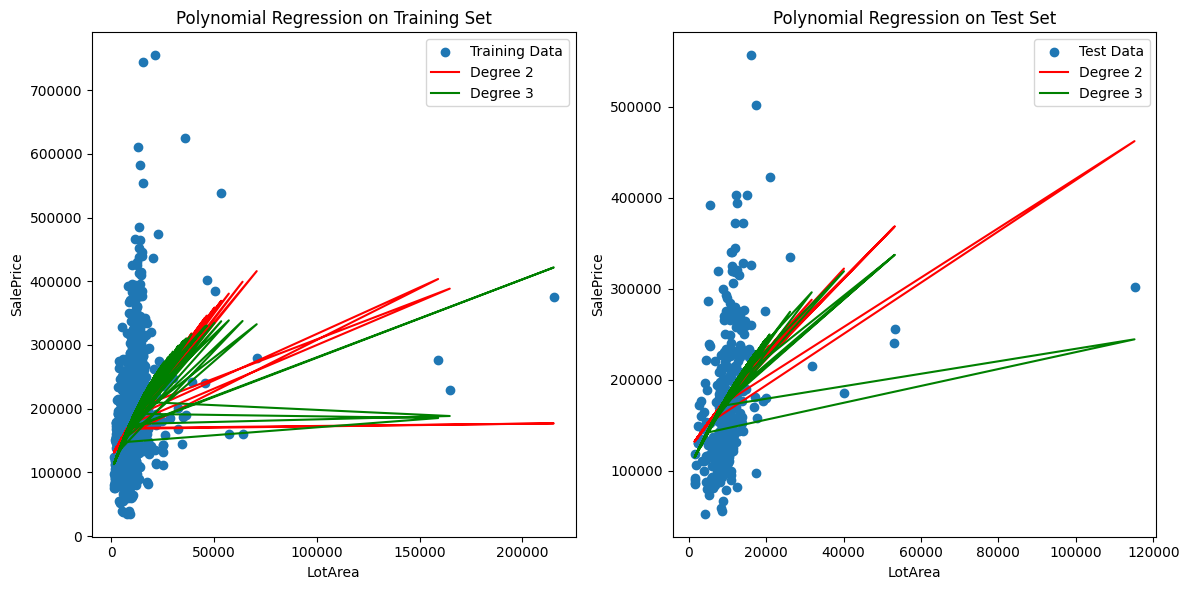

In [93]:
from sklearn.preprocessing import PolynomialFeatures

# Extract the features and target variable
X = df['LotArea'].values.reshape(-1, 1)  # Reshape to a 2D array for sklearn
y = df['SalePrice'].values

# Split the dataset into training and testing sets (using your previous KFold split)
X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

# Polynomial Regression Degree 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

print("\nPolynomial Regression Degree 2 Coefficients:")
for i, coef in enumerate(model_poly2.coef_):
    print(f"Coefficient for x^{i}: {coef}")

# Polynomial Regression Degree 3
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

model_poly3 = LinearRegression()
model_poly3.fit(X_train_poly3, y_train)

print("\nPolynomial Regression Degree 3 Coefficients:")
for i, coef in enumerate(model_poly3.coef_):
    print(f"Coefficient for x^{i}: {coef}")

# Bonus: Plot the results
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label="Training Data")
plt.plot(X_train, model_poly2.predict(X_train_poly2), color='red', label="Degree 2")
plt.plot(X_train, model_poly3.predict(X_train_poly3), color='green', label="Degree 3")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("Polynomial Regression on Training Set")
plt.legend()

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, model_poly2.predict(X_test_poly2), color='red', label="Degree 2")
plt.plot(X_test, model_poly3.predict(X_test_poly3), color='green', label="Degree 3")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("Polynomial Regression on Test Set")
plt.legend()

plt.tight_layout()
plt.show()